# Randomized Dataset Creation

In [102]:
import pandas as pd
import numpy as np
from random import choice, randint, uniform
import seaborn as sns
import matplotlib.pyplot as plt

# Created a fixed number of rows to feed into the fields
num_students = 1000
num_campaigns = 30
num_feedback = 700     
num_events = 100
num_emails = 1500

In [93]:
# Helper functions for generating random data
def random_date(start, end):
    return pd.to_datetime(start) + pd.to_timedelta(randint(0, (end - start).days), unit='days')

def random_rating():
    return round(uniform(1, 5), 2)

In [94]:
# Student Demographics
students = pd.DataFrame({
    'Student ID': range(1, num_students + 1),
    'Age': np.random.randint(25, 55, size=num_students),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], size=num_students),
    'Program Enrolled': np.random.choice(['MBA', 'MS Mechanical Engineering', 'MS Computer Science', 'MS Finance', 'MS Architecture', 'MS Aeronautics'], num_students),
    'Enrollment Date': [random_date(pd.to_datetime('2023-01-01'), pd.to_datetime('2023-12-31')) for _ in range(num_students)],
    'Professional Background': np.random.choice(['Business', 'Technology', 'Healthcare', 'Finance', 'Education'], num_students),
    'Country of Origin': np.random.choice(['USA', 'Canada', 'UK', 'India', 'China', 'Germany', 'South Korea', 'Philippines'], num_students),
    'Scholarship Received': np.random.choice(['Yes', 'No'], num_students),

})

In [95]:
# Marketing Campaign Data
campaigns = pd.DataFrame({
    'Campaign ID': range(1, num_campaigns + 1),
    'Campaign Type': np.random.choice(['Email', 'Social Media', 'Webinar'], num_campaigns),
    'Start Date': [random_date(pd.to_datetime('2023-01-01'), pd.to_datetime('2023-06-01')) for _ in range(num_campaigns)],
    'End Date': [random_date(pd.to_datetime('2023-06-02'), pd.to_datetime('2023-12-31')) for _ in range(num_campaigns)],
    'Budget': np.random.randint(500, 5000, size=num_campaigns),
    'Reach': np.random.randint(100, 10000, size=num_campaigns),
    'Engagement': np.random.randint(10, 1000, size=num_campaigns)
})

In [96]:
# Program Feedback
feedback = pd.DataFrame({
    'Student ID': np.random.choice(students['Student ID'], num_feedback),
    'Program ID': np.random.choice(students['Program Enrolled'], num_feedback),
    'Feedback Date': [random_date(pd.to_datetime('2023-01-01'), pd.to_datetime('2023-12-31')) for _ in range(num_feedback)],
    'Satisfaction Rating': [random_rating() for _ in range(num_feedback)],
    'Comments': np.random.choice(['Excellent', 'Good', 'Average', 'Below Average', 'Poor'], num_feedback)
})

In [97]:
# Event Participation
events = pd.DataFrame({
    'Event ID': range(1, num_events + 1),
    'Student ID': np.random.choice(students['Student ID'], num_events),
    'Event Type': np.random.choice(['Open House', 'Information Session', 'Webinar'], num_events),
    'Attendance Status': np.random.choice(['Attended', 'No Show'], num_events),
    'Date of Event': [random_date(pd.to_datetime('2023-01-01'), pd.to_datetime('2023-12-31')) for _ in range(num_events)]
})

In [98]:
# Email Campaign Response
emails = pd.DataFrame({
    'Email ID': range(1, num_emails + 1),
    'Student ID': np.random.choice(students['Student ID'], num_emails),
    'Sent Date': [random_date(pd.to_datetime('2023-01-01'), pd.to_datetime('2023-12-31')) for _ in range(num_emails)],
    'Opened': np.random.choice(['Yes', 'No'], num_emails),
    'Clicked': np.random.choice(['Yes', 'No'], num_emails)
})

In [99]:
# Standardize Enrollment Dates
fall_enrollment_date = pd.to_datetime('2023-09-01')
spring_enrollment_date = pd.to_datetime('2023-01-15')
students['Enrollment Date'] = np.random.choice([fall_enrollment_date, spring_enrollment_date], num_students)

# list of event types and consistent assignment of event IDs
event_types = ['Open House', 'Information Session', 'Webinar']
num_unique_events = 10  # Total unique events
unique_events = pd.DataFrame({
    'Event ID': range(1, num_unique_events + 1),
    'Event Type': np.random.choice(event_types, num_unique_events)
})
events = events.drop(columns=['Event Type'])
events['Event ID'] = np.random.choice(unique_events['Event ID'], num_events)

# Adjusting Feedback to align with actual enrollments
feedback_adjusted = []
unique_student_ids = feedback['Student ID'].unique()

for student_id in unique_student_ids:
    # Check if the student is in the student table
    if student_id in students['Student ID'].values:
        # Get the program the student is enrolled in (assuming one program per student)
        enrolled_program = students[students['Student ID'] == student_id]['Program Enrolled'].iloc[0]
        
        # Get all feedback entries for the student
        student_feedback = feedback[feedback['Student ID'] == student_id]

        selected_feedback = student_feedback.sample(n=1)
        selected_feedback['Program ID'] = enrolled_program

        feedback_adjusted.append(selected_feedback)

feedback = pd.concat(feedback_adjusted).reset_index(drop=True)



# Link emails to specific campaigns and adjust email dates
emails['Campaign ID'] = np.random.choice([4, 7, 11, 13, 20, 22, 25, 30], num_emails)
emails = emails.merge(campaigns[['Campaign ID', 'Start Date', 'End Date']], on='Campaign ID', how='left')
emails['Sent Date'] = emails.apply(lambda row: random_date(row['Start Date'], row['End Date']), axis=1)
emails = emails.drop(columns=['Start Date', 'End Date'])


In [100]:
# Create the file path for the CSVs
students_file = '/Users/jk/Desktop/MIT Project/students.csv'
campaigns_file = '/Users/jk/Desktop/MIT Project/campaigns.csv'
feedback_file = '/Users/jk/Desktop/MIT Project/feedback.csv'
events_file = '//Users/jk/Desktop/MIT Project/events.csv'
emails_file = '/Users/jk/Desktop/MIT Project/emails.csv'

In [101]:
# Convert the DataFrames to CSV files, passing in the file path variables as the location arguement
students.to_csv(students_file, index=False)
campaigns.to_csv(campaigns_file, index=False)
feedback.to_csv(feedback_file, index=False)
events.to_csv(events_file, index=False)
emails.to_csv(emails_file, index=False)

# Simple Python Distribution Visualizations

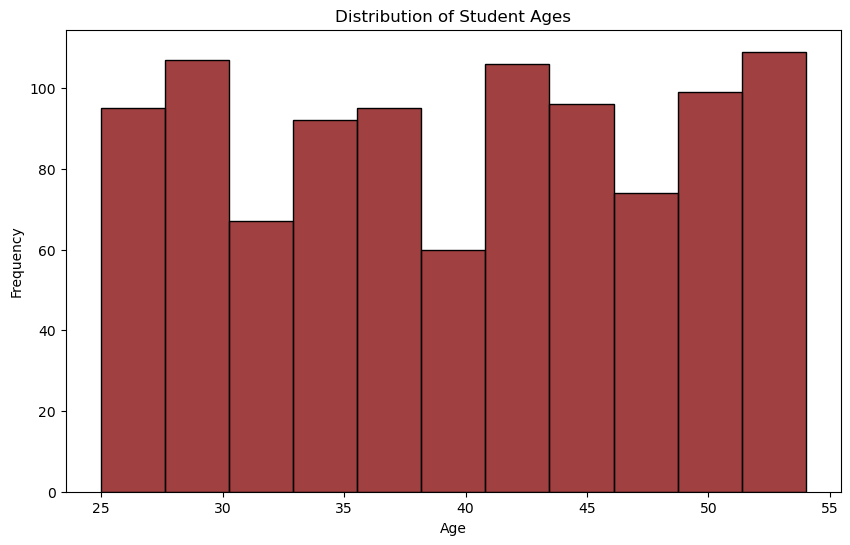

In [112]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(students['Age'], kde=False, color='maroon')
plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

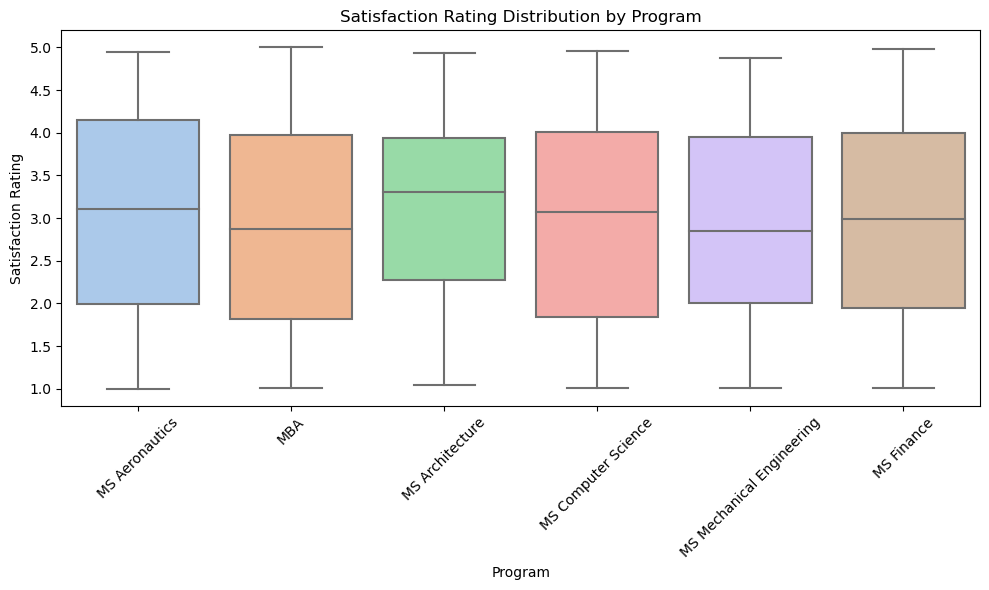

In [106]:
# Rating Distribution by Program
plt.figure(figsize=(10, 6))
sns.boxplot(x='Program ID', y='Satisfaction Rating', data=feedback, palette='pastel')
plt.title('Satisfaction Rating Distribution by Program')
plt.xticks(rotation=45)
plt.xlabel('Program')
plt.ylabel('Satisfaction Rating')
plt.tight_layout()
plt.show()

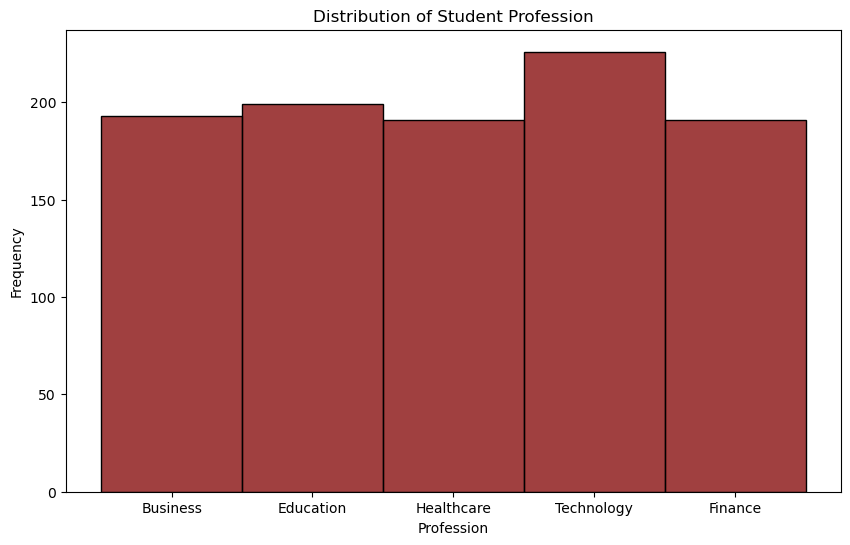

In [117]:
plt.figure(figsize=(10, 6))
sns.histplot(students['Professional Background'], kde=False, color='maroon')
plt.title('Distribution of Student Profession')
plt.xlabel('Profession')
plt.ylabel('Frequency')
plt.show()

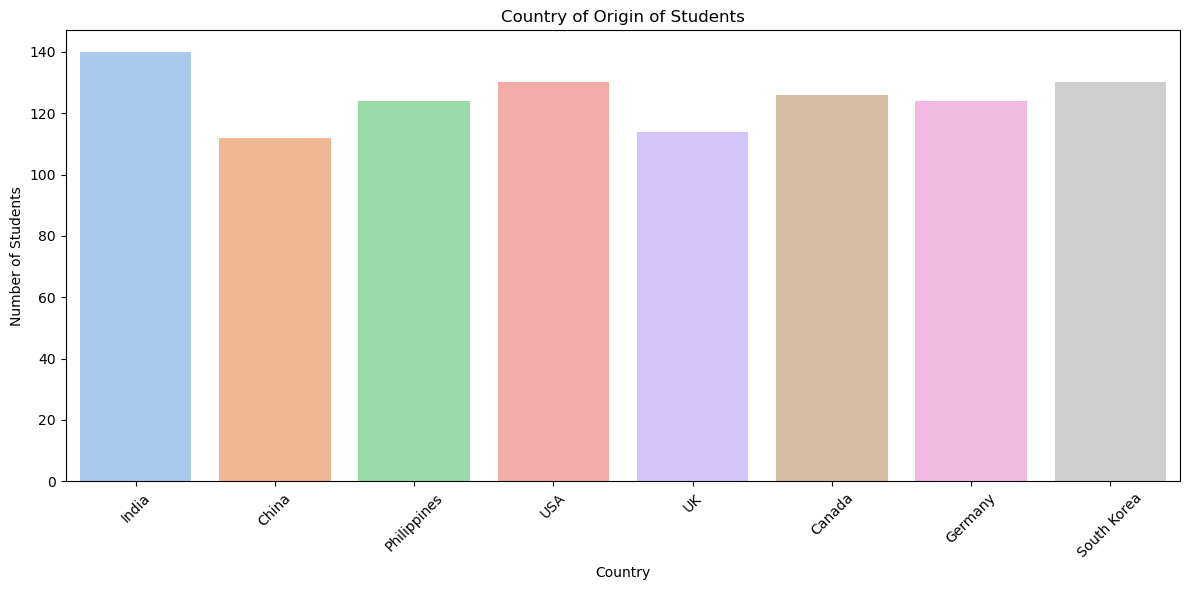

In [110]:
# Country of Origin
plt.figure(figsize=(12, 6))
sns.countplot(x='Country of Origin', data=students, palette='pastel')
plt.title('Country of Origin of Students')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

# SQL Query Examples

In [ ]:
Number of Scholarship Recipients by Program

SELECT s.`Program Enrolled`, COUNT(s.`Scholarship Received`) AS `Scholarship Count`
FROM mit_project.students s
WHERE s.`Scholarship Received` = 'Yes'
GROUP BY s.`Program Enrolled`;